<a href="https://colab.research.google.com/github/gksals8378/Insurance_cost/blob/main/0925_insurance_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/data/1project/insurance.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

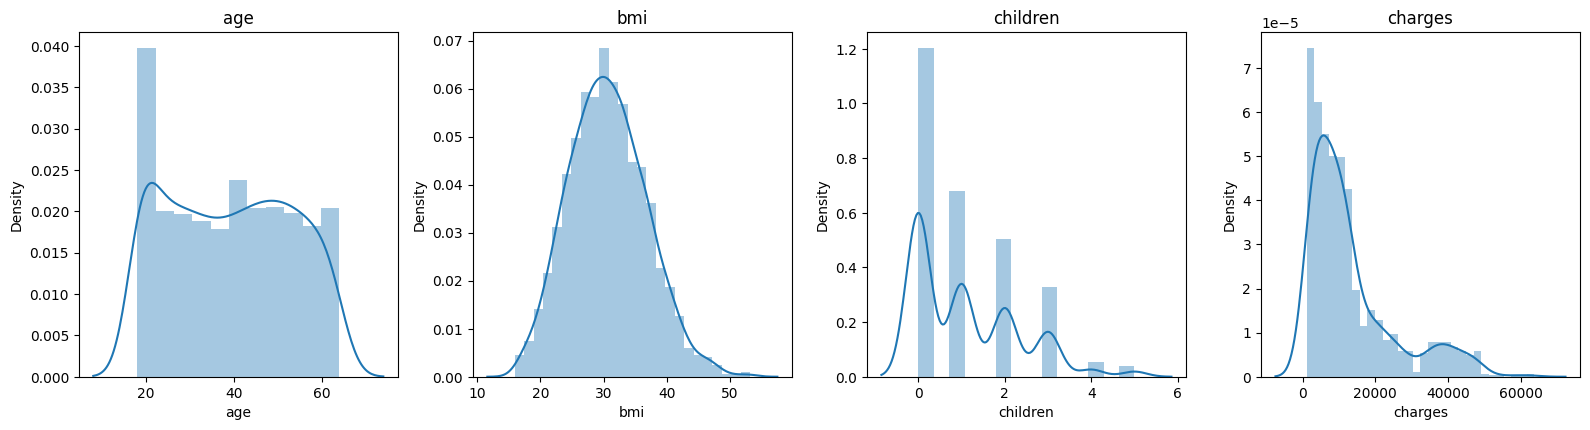

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

num_cols = len(numerical_columns)
num_rows = num_cols // 4
num_rows += num_rows % 4

position = range(1, num_cols+1)

fig = plt.figure(figsize=(16, num_rows*4))
for k, col in zip(position, numerical_columns):
  ax = fig.add_subplot(num_rows, 4, k)
  sns.distplot(df[col], ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

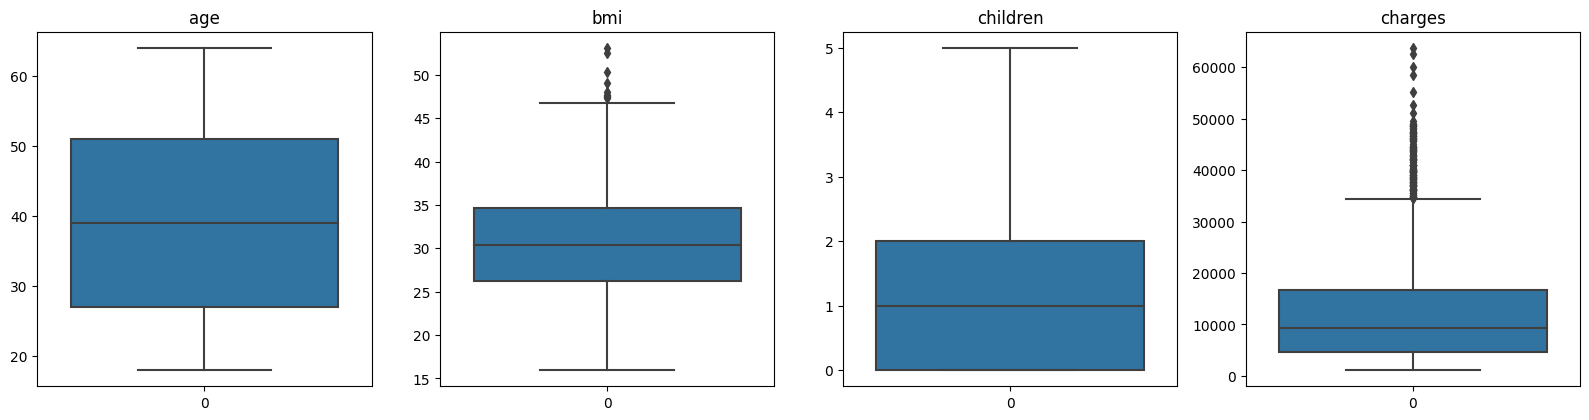

In [ ]:
fig = plt.figure(figsize=(16, num_rows*4))
for k, col in zip(position, numerical_columns):
  ax = fig.add_subplot(num_rows, 4, k)
  sns.boxplot(df[col], ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

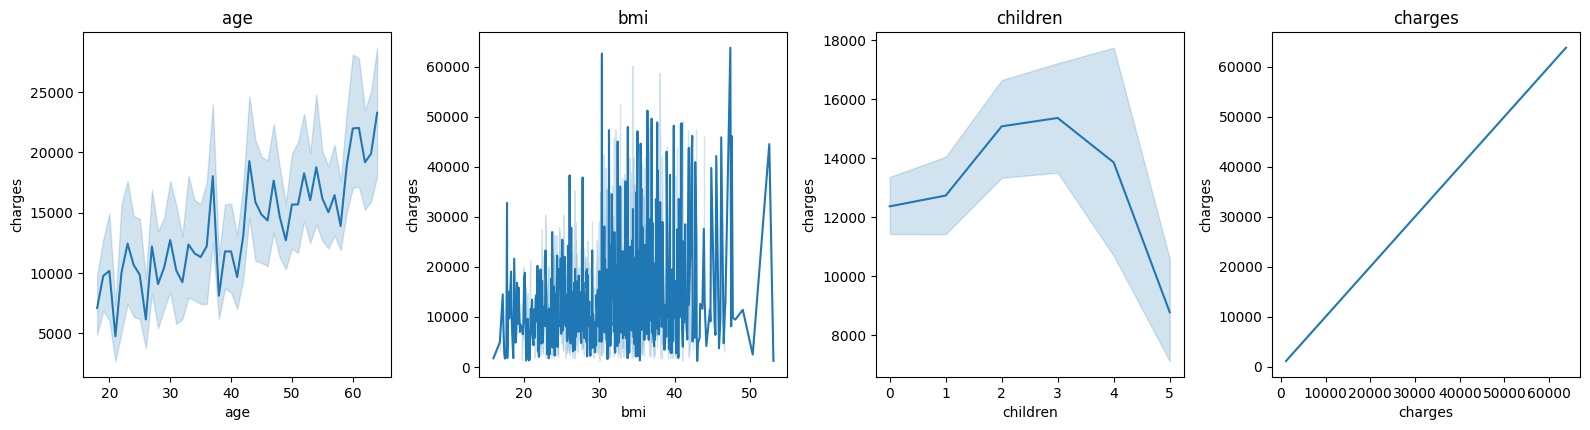

In [ ]:
fig = plt.figure(figsize=(16, num_rows*4))
for k, col in zip(position, numerical_columns):
  ax = fig.add_subplot(num_rows, 4, k)
  sns.lineplot(data=df, x=col, y='charges', ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
unique_sex = sorted(df['sex'].unique())
unique_region = sorted(df['region'].unique())


df['sex'] = pd.Categorical(df['sex'], categories=unique_sex, ordered=True)

df['region'] = pd.Categorical(df['region'], categories=unique_region, ordered=True)

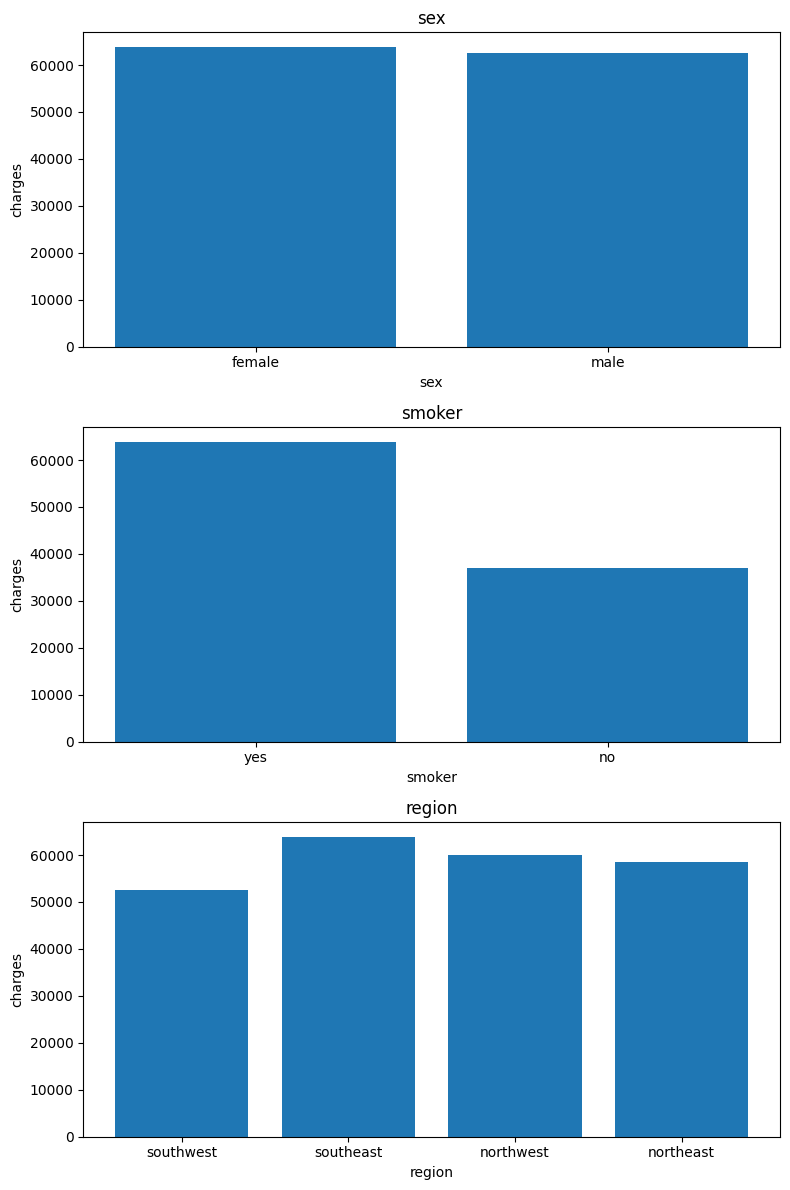

In [ ]:
# 'sex', 'smoker', 'region'
# 'charges'

fig, axes = plt.subplots(3,1, figsize=(8,12))
axes[0].bar(df['sex'], df['charges'])
axes[0].set_title('sex')
axes[0].set_xlabel('sex')
axes[0].set_ylabel('charges')

axes[1].bar(df['smoker'], df['charges'])
axes[1].set_title('smoker')
axes[1].set_xlabel('smoker')
axes[1].set_ylabel('charges')

axes[2].bar(df['region'], df['charges'])
axes[2].set_title('region')
axes[2].set_xlabel('region')
axes[2].set_ylabel('charges')

plt.tight_layout()
plt.show()


# smoker

In [ ]:
df_smoker_0 = df[df['smoker'] == 'no']
df_smoker_1 = df[df['smoker'] == 'yes']

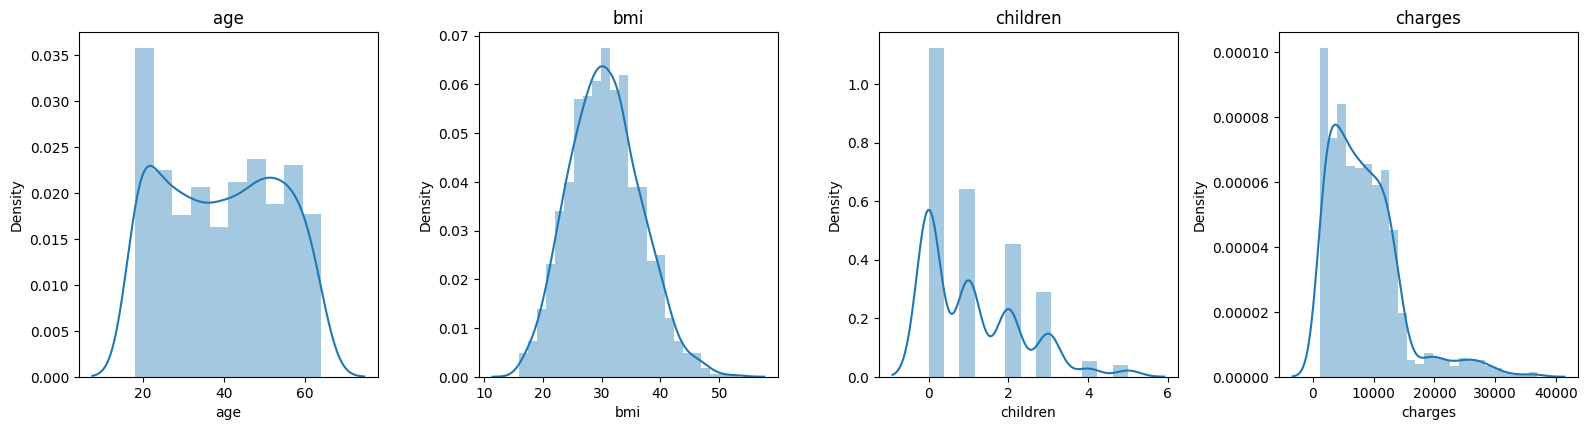

In [ ]:
# df_smoker_0 비흡연자

fig = plt.figure(figsize=(16, num_rows*4))
for k, col in zip(position, numerical_columns):
  ax = fig.add_subplot(num_rows, 4, k)
  sns.distplot(df_smoker_0[col], ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

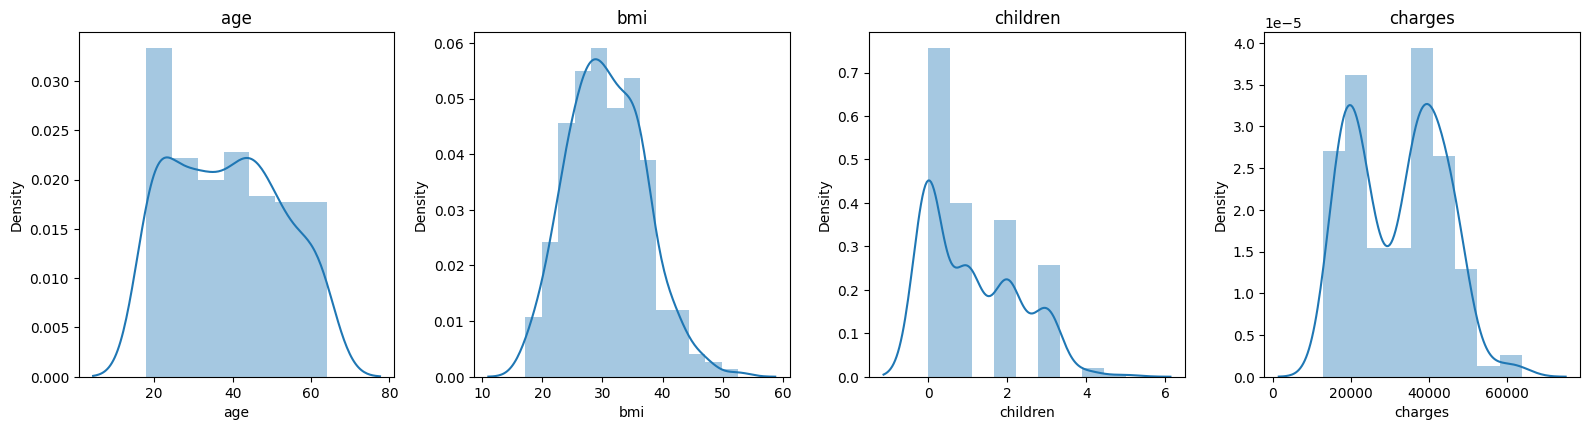

In [ ]:
# df_smoker_1 흡연자

fig = plt.figure(figsize=(16, num_rows*4))
for k, col in zip(position, numerical_columns):
  ax = fig.add_subplot(num_rows, 4, k)
  sns.distplot(df_smoker_1[col], ax=ax)
  ax.set_title(col)

plt.tight_layout()
plt.show()

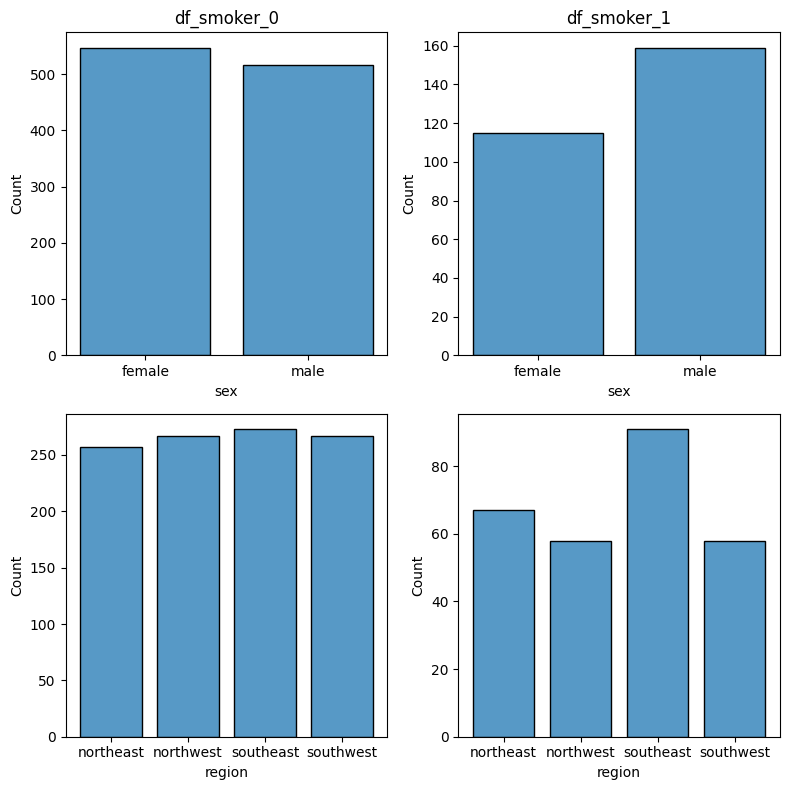

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(2, 2, 1)
sns.histplot(df_smoker_0['sex'], shrink=0.8)
ax.set_title('df_smoker_0')

ax = fig.add_subplot(2, 2, 2)
sns.histplot(df_smoker_1['sex'], shrink=0.8)
ax.set_title('df_smoker_1')

ax = fig.add_subplot(2, 2, 3)
sns.histplot(df_smoker_0['region'], shrink=0.8)

ax = fig.add_subplot(2, 2, 4)
sns.histplot(df_smoker_1['region'], shrink=0.8)


plt.tight_layout()
plt.show()

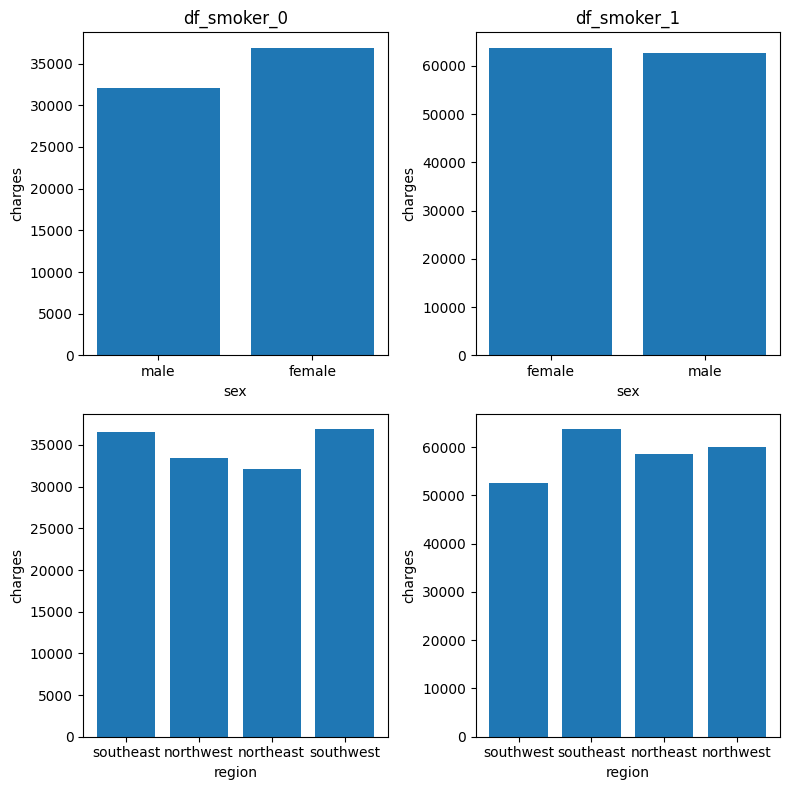

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(8,8))
axes[0][0].bar(df_smoker_0['sex'], df_smoker_0['charges'])
axes[0][0].set_title('df_smoker_0')
axes[0][0].set_xlabel('sex')
axes[0][0].set_ylabel('charges')

axes[0][1].bar(df_smoker_1['sex'], df_smoker_1['charges'])
axes[0][1].set_title('df_smoker_1')
axes[0][1].set_xlabel('sex')
axes[0][1].set_ylabel('charges')


axes[1][0].bar(df_smoker_0['region'], df_smoker_0['charges'])
axes[1][0].set_xlabel('region')
axes[1][0].set_ylabel('charges')

axes[1][1].bar(df_smoker_1['region'], df_smoker_1['charges'])
axes[1][1].set_xlabel('region')
axes[1][1].set_ylabel('charges')

plt.tight_layout()
plt.show()

# 전처리


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# df['sex']  
- male : 0
- female : 1

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
# male : 0 // female : 1
df['sex'] = np.where(df['sex'] == "male", 0, 1)
df['sex'].value_counts()

0    676
1    662
Name: sex, dtype: int64

# df['smoker']  
- no : 0
- yes : 1

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
# no : 0 // yes : 1
df['smoker'] = np.where(df['smoker'] == "no", 0, 1)
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

# df['region']
- get_dummies

In [ ]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
dum = pd.get_dummies(df['region'], dtype=float)
dum

,northeast,northwest,southeast,southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0


In [ ]:
all = [df, dum]
df = pd.concat(all, axis=1)
df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,0,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,0,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,0,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,0,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830,0.0,1.0,0.0,0.0
1334,18,1,31.920,0,0,northeast,2205.98080,1.0,0.0,0.0,0.0
1335,18,1,36.850,0,0,southeast,1629.83350,0.0,0.0,1.0,0.0
1336,21,1,25.800,0,0,southwest,2007.94500,0.0,0.0,0.0,1.0


In [ ]:
df.drop(['region'], inplace=True, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   float64
 7   northwest  1338 non-null   float64
 8   southeast  1338 non-null   float64
 9   southwest  1338 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 104.7 KB


In [ ]:
df.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,-0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


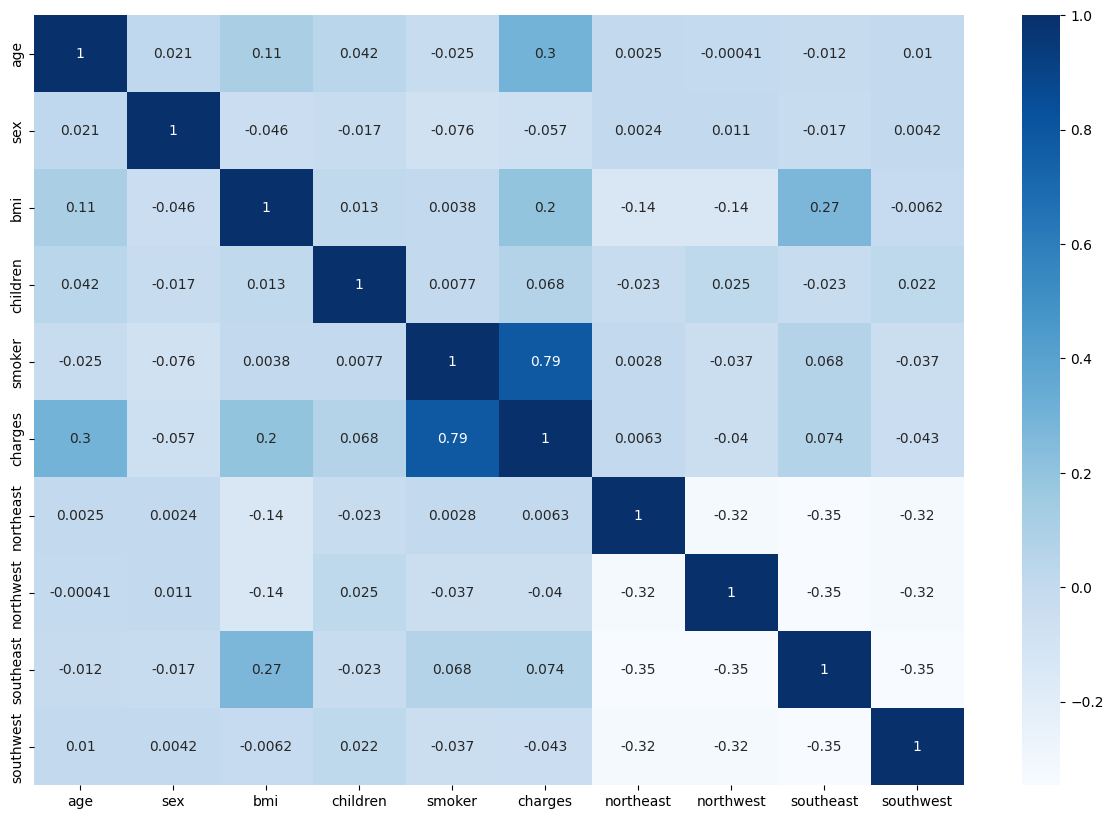

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

<Figure size 1500x1000 with 0 Axes>

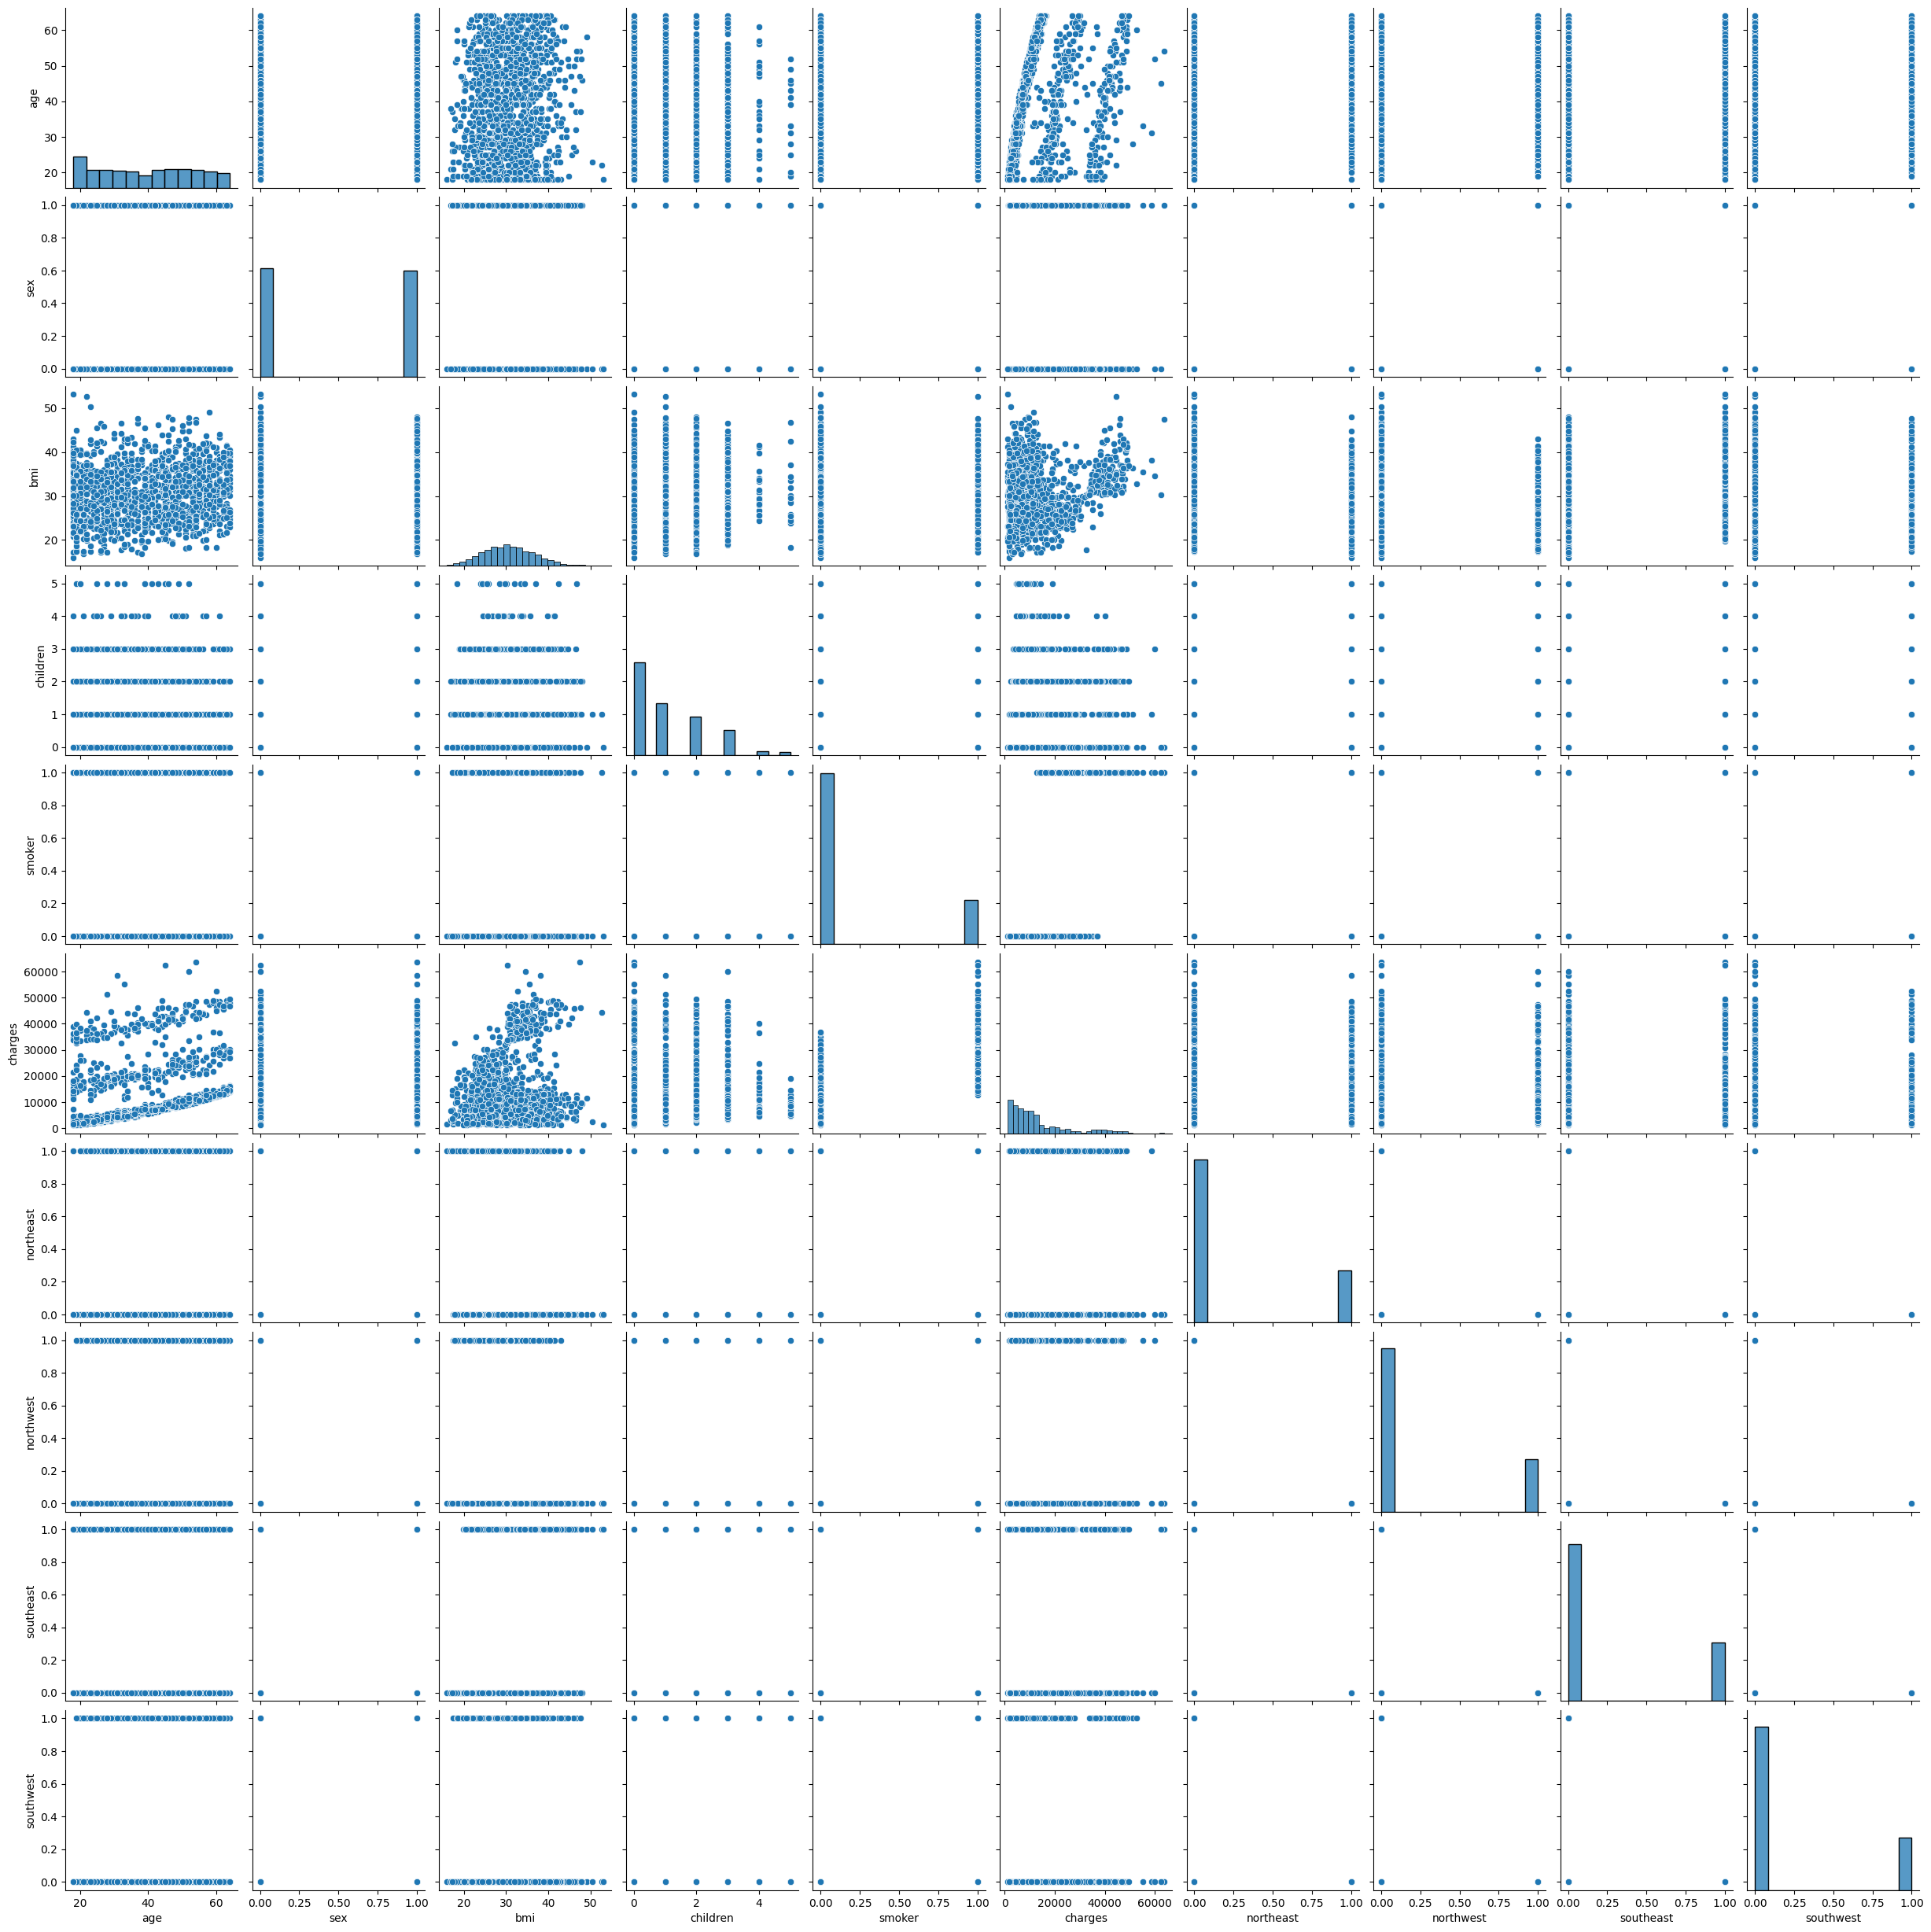

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.show()

In [ ]:
df.describe()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [ ]:
import numpy as np
a = np.abs(df.corr().round(3)['charges'])
a.sort_values(ascending=False)[1:6] #상위 5개, 자기 자신 제외

smoker       0.787
age          0.299
bmi          0.198
southeast    0.074
children     0.068
Name: charges, dtype: float64

In [ ]:
X = df.drop(['charges'], axis=1)
y = df['charges']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (936, 9)
y_train (936,)
X_test (402, 9)
y_test (402,)


# LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

print('선형회귀모델의 계수 : ', lm.intercept_)
print('선형회귀모델의 절편 : ', lm.coef_)

선형회귀모델의 계수 :  -11849.939953474792
선형회귀모델의 절편 :  [  251.68186515   282.79634661   322.38910684   344.9642553
 24059.39047692   527.9051883    223.81509065  -411.4369086
  -340.28337035]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = lm.predict(X_test)

print('mse : ', mean_squared_error(y_test, y_pred))
print('mae : ',mean_absolute_error(y_test, y_pred))
print('r2 score : ',r2_score(y_test, y_pred))

mse :  36761456.35201328
mae :  4139.932064766012
r2 score :  0.740598931692721


# KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)


print('MSE : ', mean_squared_error(y_test, y_pred))
print('MAE : ',mean_absolute_error(y_test, y_pred))
print('r2 score : ',r2_score(y_test, y_pred))

MSE :  127026056.20223202
MAE :  8026.030138108956
r2 score :  0.1036618798179122


# DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtm = DecisionTreeRegressor(random_state=1)
dtm.fit(X_train, y_train)

y_pred = dtm.predict(X_test)

print('MSE : ', mean_squared_error(y_test, y_pred))
print('MAE : ',mean_absolute_error(y_test, y_pred))
print('r2 score : ',r2_score(y_test, y_pred))

MSE :  40135253.68267757
MAE :  2982.4875324104473
r2 score :  0.7167922951044882


# RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10 , random_state=1)

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test  = rf.predict(X_test)

print("train MAE : ", mean_absolute_error(y_train, y_pred_train))
print("train R2 : ",r2_score(y_train, y_pred_train))

print("test MAE : ", mean_absolute_error(y_test, y_pred_test))
print("test R2 : ", r2_score(y_test, y_pred_test))

train MAE :  1044.8409908207266
train R2 :  0.9686987024356818
test MAE :  2924.5147269890545
test R2 :  0.8096925886696164


In [ ]:
df3 = pd.DataFrame({'y_test' : y_test, 'y_pred_test' : y_pred_test, 'diff' : y_test-y_pred_test}).reset_index(drop=True)
df3.head()

,y_test,y_pred_test,diff
0,1646.4297,1775.584195,-129.154495
1,11353.2276,16359.349806,-5006.122206
2,8798.5930,9089.926830,-291.333830
3,10381.4787,10803.758810,-422.280110
4,2103.0800,1893.577770,209.502230


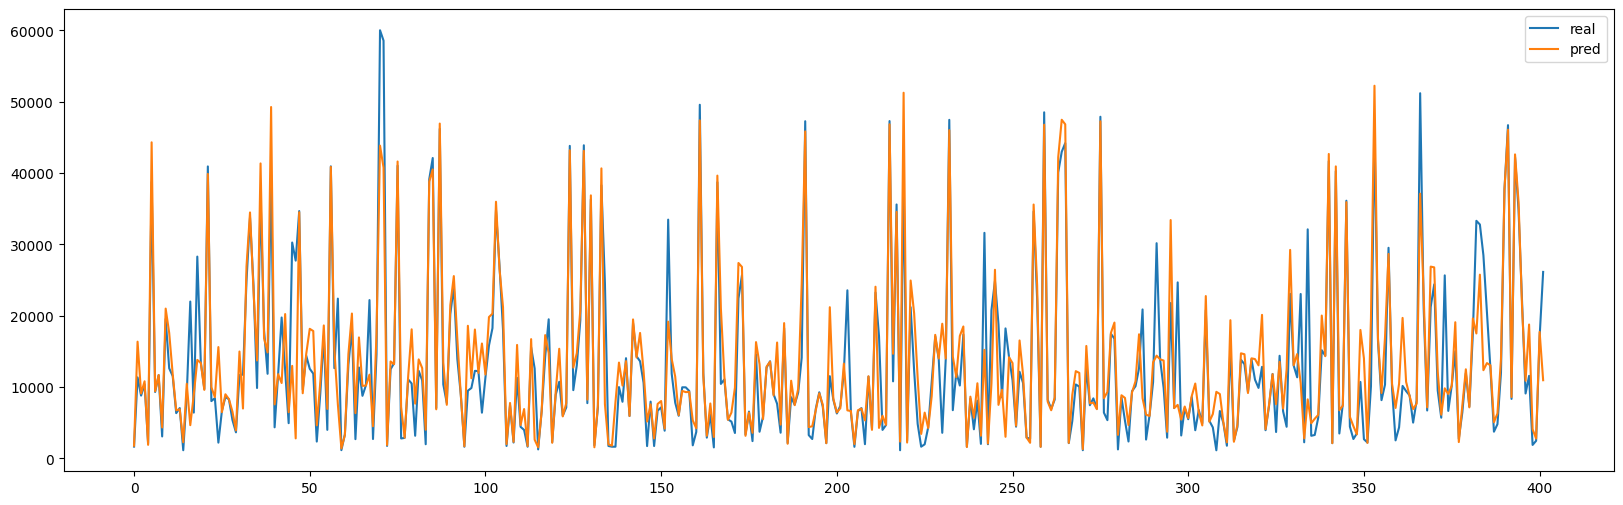

In [ ]:
# 실제값과 예측값을 plot으로 시각화
plt.figure(figsize=(20,6))
plt.plot(df3["y_test"][:500],label="real")
plt.plot(df3["y_pred_test"][:500],label="pred")
plt.legend()
plt.show()

In [ ]:
# feature_importances_ 출력
rf.feature_importances_

array([0.12904379, 0.0051712 , 0.19314596, 0.01859092, 0.63483306,
       0.0051059 , 0.00589038, 0.00456554, 0.00365325])

In [ ]:
#feature_importances_ 를 시리즈로 출력 (인덱스는 칼럼명)
s_f_i = pd.Series(rf.feature_importances_, index=X_train.columns)
s_f_i.sort_values(ascending=False, inplace=True)

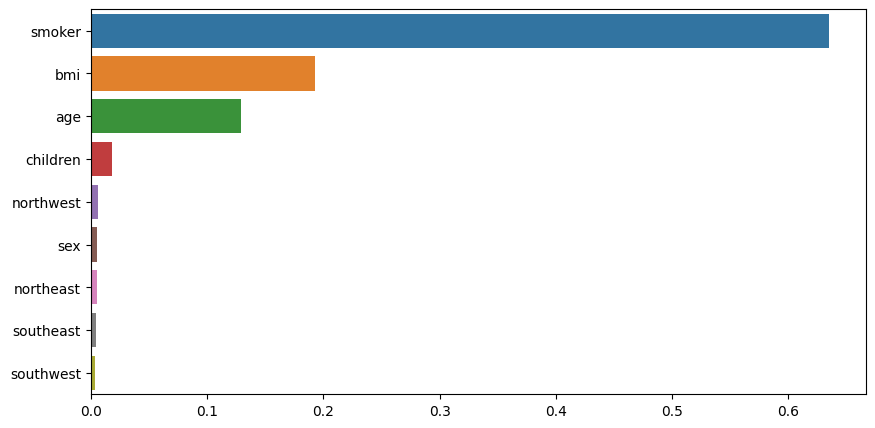

In [ ]:
# feature_importances_ 을 내림차순으로 정렬하여 barplot으로 시각화
plt.figure(figsize=(10,5))
sns.barplot(x=s_f_i, y=s_f_i.index)
plt.show()

# pycaret.regression

In [ ]:
!pip install pycaret

In [ ]:
!pip install --upgrade pycaret scipy

- setup

In [ ]:
from pycaret.regression import *

sup = setup(df, target='charges', train_size=0.7)

,Description,Value
0,Session id,7852
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 10)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


- compare_models

In [ ]:
comp = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2460.2353,20239432.7507,4477.4524,0.8574,0.4013,0.2745,0.1740
lightgbm,Light Gradient Boosting Machine,2753.2614,22645489.5166,4743.6803,0.8405,0.5155,0.3335,0.1090
rf,Random Forest Regressor,2615.1020,23397345.1248,4816.2113,0.8353,0.4311,0.2945,0.2540
xgboost,Extreme Gradient Boosting,2898.5544,25860322.4000,5069.9750,0.8203,0.5161,0.3682,0.1670
et,Extra Trees Regressor,2648.0546,26558689.5233,5127.4467,0.8138,0.4533,0.2924,0.2700
ada,AdaBoost Regressor,4355.2466,28466142.4686,5323.8988,0.7991,0.6413,0.7617,0.0550
br,Bayesian Ridge,4183.4695,37264937.0000,6085.5372,0.7434,0.5958,0.4345,0.0350
llar,Lasso Least Angle Regression,4176.9385,37263490.2000,6085.3658,0.7434,0.5950,0.4334,0.0270
lar,Least Angle Regression,4176.7139,37263398.0000,6085.3529,0.7434,0.6035,0.4333,0.0310
ridge,Ridge Regression,4190.2342,37266854.4000,6085.7480,0.7434,0.5994,0.4356,0.0390


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

- create_model

In [ ]:
top1 = create_model('gbr', cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,2575.8050,22746809.1686,4769.3615,0.8385,0.4332,0.2611


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
top2 = create_model('rf', cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,2719.8508,25092096.4936,5009.2012,0.8219,0.4472,0.2674


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
top3 = create_model('lightgbm', cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,2843.8561,24131521.5819,4912.3845,0.8287,0.5077,0.3026


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

- tune_model

In [ ]:
tuned_gbr = tune_model(top1, optimize='R2', n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3121.8899,25938742.7174,5093.0092,0.8370,0.4288,0.3646
1,2818.8137,21823973.6911,4671.6136,0.8445,0.5789,0.3287
2,3443.7644,34530289.9158,5876.2479,0.7767,0.8466,0.5121
3,2667.3337,23625652.2654,4860.6226,0.8664,0.4646,0.2878
4,2921.6036,22327557.1867,4725.2045,0.8590,0.6785,0.3529
5,2554.4778,22155641.1857,4706.9779,0.7438,0.4129,0.3159
6,3286.3491,26743146.8847,5171.3777,0.8303,0.5446,0.3222
7,2722.6032,20111545.3751,4484.5898,0.8519,0.6461,0.3609
8,2928.5330,25349608.3375,5034.8395,0.8563,0.5332,0.3736


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_rf = tune_model(top2, optimize='R2', n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2622.8432,26465809.1494,5144.4931,0.8337,0.4219,0.1982
1,2589.6350,21716633.4390,4660.1109,0.8453,0.4602,0.2461
2,2878.0381,32653345.2476,5714.3106,0.7889,0.5412,0.2426
3,2582.8602,25590401.1232,5058.6956,0.8553,0.4045,0.2290
4,2343.8692,21651027.5702,4653.0665,0.8633,0.3855,0.2193
5,2120.5891,22856138.2369,4780.8094,0.7357,0.3433,0.2168
6,2503.3674,24374868.2770,4937.0911,0.8454,0.4432,0.1775
7,2228.0459,20466839.7049,4524.0291,0.8493,0.4647,0.2264
8,2050.1400,14940528.5246,3865.2980,0.9153,0.3774,0.1905


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_lightgbm = tune_model(top3, optimize='R2', n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3067.9903,25120576.6643,5012.0432,0.8421,0.4424,0.3495
1,2593.0747,19286505.2619,4391.6404,0.8626,0.5257,0.2809
2,3160.2499,29783902.4330,5457.4630,0.8074,0.5491,0.3290
3,2326.2061,20559598.5595,4534.2694,0.8837,0.3883,0.2690
4,2516.8164,21768390.6811,4665.6608,0.8625,0.4609,0.3004
5,2613.6656,24370468.3663,4936.6455,0.7182,0.6689,0.3360
6,3126.9177,24736477.6543,4973.5780,0.8431,0.4557,0.3160
7,2629.7521,18645261.2866,4318.0159,0.8627,0.4326,0.3215
8,2353.0606,16903073.4884,4111.3348,0.9042,0.4012,0.2742


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


- blend_models

In [ ]:
blender_specific = blend_models(estimator_list=[tuned_gbr, tuned_rf, tuned_lightgbm], optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2506.8671,22776782.7012,4772.5028,0.8569,0.3694,0.2380
1,2277.0898,18251271.8841,4272.1507,0.8700,0.4266,0.2221
2,2732.4478,29238347.7027,5407.2496,0.8110,0.4910,0.2485
3,2138.6020,20452572.2061,4522.4520,0.8843,0.3406,0.2148
4,2167.8908,19889018.2062,4459.7106,0.8744,0.3489,0.2186
5,2125.6983,21686216.9905,4656.8462,0.7492,0.3545,0.2432
6,2456.9437,21053653.3112,4588.4260,0.8664,0.3802,0.2140
7,2192.0630,17630532.7290,4198.8728,0.8702,0.4011,0.2395
8,1960.6105,14892154.2239,3859.0354,0.9156,0.3331,0.1954


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

- predict_model

In [ ]:
final_model = finalize_model(blender_specific)
pred = predict_model(final_model, data=df)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,1950.1695,15778309.5151,3972.1920,0.8923,0.3289,0.1998


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


# smoker = 1 (yes)에서 bmi와 상관관계가 있어보인다.

<Axes: xlabel='charges', ylabel='bmi'>

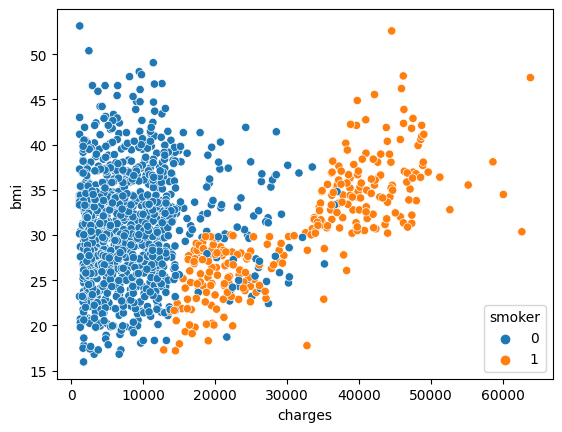

In [ ]:
# df_smoker_1
# bmi
# charges

sns.scatterplot(data=df, x="charges", y='bmi', hue='smoker')

In [ ]:
df_smoker_1_bmi_30 = df[(df['bmi'] > 30) & (df['smoker'] == 1)]

In [ ]:
df_smoker_1_bmi_30

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
14,27,0,42.130,0,1,39611.75770,0.0,0.0,1.0,0.0
19,30,0,35.300,0,1,36837.46700,0.0,0.0,0.0,1.0
23,34,1,31.920,1,1,37701.87680,1.0,0.0,0.0,0.0
29,31,0,36.300,2,1,38711.00000,0.0,0.0,0.0,1.0
30,22,0,35.600,0,1,35585.57600,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1300,45,0,30.360,0,1,62592.87309,0.0,0.0,1.0,0.0
1301,62,0,30.875,3,1,46718.16325,0.0,1.0,0.0,0.0
1308,25,1,30.200,0,1,33900.65300,0.0,0.0,0.0,1.0
1313,19,1,34.700,2,1,36397.57600,0.0,0.0,0.0,1.0


In [ ]:
df_smoker_1_bmi_30.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,0.009681,0.018267,0.109038,NaN,0.697570,0.020544,0.023317,0.016778,-0.058890
sex,0.009681,1.000000,0.007741,-0.096599,NaN,0.081254,-0.017024,0.106336,-0.057319,-0.009456
bmi,0.018267,0.007741,1.000000,0.083342,NaN,0.365062,-0.138664,-0.185507,0.358638,-0.123211
children,0.109038,-0.096599,0.083342,1.000000,NaN,0.136090,-0.015924,0.146930,-0.077064,-0.022710
smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,0.697570,0.081254,0.365062,0.136090,NaN,1.000000,-0.036103,0.054976,0.079628,-0.105290
northeast,0.020544,-0.017024,-0.138664,-0.015924,NaN,-0.036103,1.000000,-0.218938,-0.412396,-0.279186
northwest,0.023317,0.106336,-0.185507,0.146930,NaN,0.054976,-0.218938,1.000000,-0.358044,-0.242390
southeast,0.016778,-0.057319,0.358638,-0.077064,NaN,0.079628,-0.412396,-0.358044,1.000000,-0.456571
southwest,-0.058890,-0.009456,-0.123211,-0.022710,NaN,-0.105290,-0.279186,-0.242390,-0.456571,1.000000


In [ ]:
sup = setup(df_smoker_1_bmi_30, target='charges', train_size=0.7)

,Description,Value
0,Session id,1276
1,Target,charges
2,Target type,Regression
3,Original data shape,"(144, 10)"
4,Transformed data shape,"(144, 10)"
5,Transformed train set shape,"(100, 10)"
6,Transformed test set shape,"(44, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [ ]:
comp = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,1463.4015,13253582.2802,2888.8099,0.7024,0.0614,0.0299,0.0420
en,Elastic Net,1872.4686,13526238.6250,3149.7544,0.6854,0.0673,0.0401,0.0160
br,Bayesian Ridge,1885.5116,13645032.1750,3163.7220,0.6816,0.0676,0.0403,0.0180
ridge,Ridge Regression,1960.8507,13988656.9500,3289.4718,0.6580,0.0700,0.0420,0.0170
lasso,Lasso Regression,1975.2960,14063886.5500,3306.1220,0.6544,0.0704,0.0424,0.0160
llar,Lasso Least Angle Regression,1975.2983,14063894.9750,3306.1231,0.6544,0.0704,0.0424,0.0170
lr,Linear Regression,1976.1343,14068855.2000,3307.1784,0.6542,0.0704,0.0424,0.0190
lar,Least Angle Regression,1976.1354,14068859.6000,3307.1794,0.6542,0.0704,0.0424,0.0190
knn,K Neighbors Regressor,2279.7585,17318732.9750,3668.4162,0.5841,0.0802,0.0501,0.0200
lightgbm,Light Gradient Boosting Machine,2407.2387,16376191.1527,3722.7727,0.5772,0.0810,0.0531,0.1070


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
top1 = create_model('huber', cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,1303.3997,14619610.0186,3823.5599,0.4899,0.0785,0.0265


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
top2 = create_model('br', cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,1658.6047,14288739.0000,3780.0449,0.5014,0.0777,0.0357


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
top3 = create_model('en', cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,1658.3203,14217282.0000,3770.5813,0.5039,0.0774,0.0357


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_huber = tune_model(top1, optimize='R2', n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2080.4689,24554986.1032,4955.2988,0.5744,0.0959,0.0384
1,531.5598,343754.9171,586.3062,0.9815,0.0145,0.0130
2,1921.9496,18912914.5436,4348.8981,0.3637,0.0989,0.0403
3,559.8704,436959.9686,661.0295,0.9822,0.0157,0.0135
4,3433.9140,42507416.5112,6519.7712,0.5391,0.1298,0.0639
5,2598.7852,33407802.3711,5779.9483,0.1399,0.1182,0.0489
6,478.2410,336791.9439,580.3378,0.9860,0.0154,0.0122
7,1360.7241,8431229.2174,2903.6579,0.6720,0.0623,0.0290
8,551.5555,434211.5068,658.9473,0.9775,0.0163,0.0137


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_br = tune_model(top2, optimize='R2', n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2699.4238,25376340.0000,5037.4937,0.5602,0.0990,0.0545
1,1114.5735,1750921.6250,1323.2240,0.9056,0.0304,0.0263
2,2215.3679,17607292.0000,4196.1045,0.4076,0.0944,0.0475
3,1176.3074,1850736.3750,1360.4177,0.9245,0.0322,0.0285
4,3414.9771,41727992.0000,6459.7207,0.5475,0.1283,0.0632
5,2655.6746,32894476.0000,5735.3706,0.1531,0.1178,0.0522
6,1029.6809,1448690.0000,1203.6154,0.9396,0.0282,0.0246
7,1597.8754,6602050.0000,2569.4456,0.7432,0.0546,0.0355
8,1568.9043,2540079.5000,1593.7627,0.8681,0.0387,0.0386


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
tuned_en = tune_model(top3, optimize='R2', n_iter=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2685.2036,25436168.0000,5043.4282,0.5592,0.0991,0.0542
1,1057.7738,1518521.2500,1232.2830,0.9181,0.0291,0.0254
2,2007.9758,16132438.0000,4016.5208,0.4572,0.0906,0.0439
3,1167.6589,1706053.6250,1306.1599,0.9304,0.0311,0.0283
4,3512.8782,42582860.0000,6525.5542,0.5383,0.1298,0.0656
5,2784.3560,33667296.0000,5802.3525,0.1332,0.1196,0.0552
6,934.3336,1173249.3750,1083.1664,0.9511,0.0260,0.0228
7,1726.8840,6200153.0000,2490.0107,0.7588,0.0541,0.0395
8,1583.7074,2659550.0000,1630.8126,0.8619,0.0401,0.0393


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
blender_specific = blend_models(estimator_list=[tuned_huber, tuned_br, tuned_en], optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2410.4663,24678454.1360,4967.7414,0.5723,0.0968,0.0472
1,807.5066,929444.7078,964.0771,0.9499,0.0228,0.0194
2,1940.9115,17170123.8433,4143.6848,0.4223,0.0935,0.0412
3,914.4799,1133794.5331,1064.7979,0.9538,0.0253,0.0220
4,3416.5634,42071681.7931,6486.2687,0.5438,0.1288,0.0632
5,2591.1592,33100488.5524,5753.3024,0.1478,0.1180,0.0502
6,642.5374,617189.1538,785.6139,0.9743,0.0189,0.0155
7,1522.5417,6763455.0272,2600.6643,0.7369,0.0556,0.0337
8,1199.7712,1527980.2733,1236.1150,0.9207,0.0306,0.0299


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
final_model = finalize_model(blender_specific)
pred = predict_model(final_model, data=df_smoker_1_bmi_30)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,1553.8647,12957968.0741,3599.7178,0.6160,0.0742,0.0329


In [ ]:
# 분류모델로 파이 캐럿으로 y = 담배로

# 분류모델로 파이 캐럿으로 y = 담배로

In [ ]:
from pycaret.classification import *
clf = setup(df, target='smoker', train_size=0.7)

,Description,Value
0,Session id,1905
1,Target,smoker
2,Target type,Binary
3,Original data shape,"(1338, 10)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9669,0.9925,0.9421,0.9041,0.9203,0.8995,0.9017,0.1070
xgboost,Extreme Gradient Boosting,0.9604,0.9919,0.9213,0.8959,0.9050,0.8801,0.8829,0.0750
rf,Random Forest Classifier,0.9583,0.9923,0.9268,0.8807,0.9018,0.8754,0.8770,0.3620
gbc,Gradient Boosting Classifier,0.9583,0.9875,0.9216,0.8828,0.9005,0.8742,0.8755,0.1470
et,Extra Trees Classifier,0.9562,0.9917,0.9011,0.8920,0.8947,0.8671,0.8685,0.1720
dt,Decision Tree Classifier,0.9552,0.9291,0.8850,0.9009,0.8877,0.8599,0.8635,0.0420
ada,Ada Boost Classifier,0.9487,0.9865,0.8955,0.8609,0.8773,0.8449,0.8456,0.1110
lr,Logistic Regression,0.9359,0.9834,0.8392,0.8577,0.8434,0.8034,0.8072,0.0590
lda,Linear Discriminant Analysis,0.9284,0.9824,0.8179,0.8432,0.8227,0.7783,0.7841,0.0250
knn,K Neighbors Classifier,0.9210,0.9591,0.8395,0.7950,0.8134,0.7635,0.7665,0.0610


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
df['bmi_cate'] = df['bmi'].apply(lambda x: 'under' if x < 18.5 else ('health' if 18.5 <= x < 25 else ('over' if 25 <= x < 30 else ('class_1' if 30 <= x < 35 else ('class_2' if 35 <= x < 40 else 'class_3')))))

In [ ]:
df_1 = df.drop('bmi', axis = 1)

In [ ]:
from pycaret.classification import *
clf = setup(df_1, target='bmi_cate', train_size=0.7)

,Description,Value
0,Session id,7998
1,Target,bmi_cate
2,Target type,Multiclass
3,Target mapping,"class_1: 0, class_2: 1, class_3: 2, health: 3, over: 4, under: 5"
4,Original data shape,"(1338, 10)"
5,Transformed data shape,"(1338, 10)"
6,Transformed train set shape,"(936, 10)"
7,Transformed test set shape,"(402, 10)"
8,Numeric features,9
9,Preprocess,True


In [ ]:
best_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.3472,0.6166,0.3472,0.3372,0.3350,0.1332,0.1350,0.6180
gbc,Gradient Boosting Classifier,0.3441,0.6414,0.3441,0.3421,0.3271,0.1218,0.1246,1.0810
lightgbm,Light Gradient Boosting Machine,0.3398,0.6155,0.3398,0.3382,0.3324,0.1291,0.1302,0.6600
lda,Linear Discriminant Analysis,0.3387,0.6381,0.3387,0.2870,0.2840,0.0921,0.1022,0.0290
rf,Random Forest Classifier,0.3313,0.6108,0.3313,0.3292,0.3254,0.1217,0.1225,0.2660
et,Extra Trees Classifier,0.3237,0.5784,0.3237,0.3183,0.3170,0.1126,0.1132,0.2220
dt,Decision Tree Classifier,0.3216,0.5569,0.3216,0.3262,0.3184,0.1165,0.1174,0.0310
ridge,Ridge Classifier,0.3195,0.0000,0.3195,0.2360,0.2475,0.0544,0.0648,0.0260
nb,Naive Bayes,0.2981,0.5742,0.2981,0.2346,0.2178,0.0330,0.0419,0.0280
dummy,Dummy Classifier,0.2928,0.5000,0.2928,0.0857,0.1326,0.0000,0.0000,0.0230


Processing:   0%|          | 0/65 [00:00<?, ?it/s]